In [26]:
import pandas as pd
import quandl
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from jupyterthemes import jtplot
# from stockstats import StockDataFrame as Sdf
jtplot.reset()
import math

In [27]:
df = pd.read_csv('../../stocks_dfs/AAPL.csv',index_col=0)


In [28]:
df = df[-1019:]
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-14,73.535713,74.018570,72.225716,72.827141,65.864456,252394800
2012-12-17,72.704285,74.285713,71.604286,74.118568,67.032394,189401800
2012-12-18,75.000000,76.414284,74.321426,76.271431,68.979446,156421300
2012-12-19,75.924286,76.242859,75.071426,75.187141,67.998825,112342300
2012-12-20,75.714287,75.742859,74.125717,74.532860,67.407104,120422400


In [29]:
df['SMA_20'] = df['Adj Close'].rolling(20).mean()
df['EWMA_12'] = df['Adj Close'].ewm(span = 12).mean()
df['HL_PCT'] = (df['High'] - df['Low']) / df['Low'] * 100.0
df['Return'] = df['Adj Close'].pct_change()

In [30]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_20,EWMA_12,HL_PCT,Return
Date,,,,,,,,,,
2012-12-14,73.535713,74.018570,72.225716,72.827141,65.864456,252394800,NaN,65.864456,2.482293,NaN
2012-12-17,72.704285,74.285713,71.604286,74.118568,67.032394,189401800,NaN,66.497089,3.744786,0.017732
2012-12-18,75.000000,76.414284,74.321426,76.271431,68.979446,156421300,NaN,67.465954,2.815955,0.029046
2012-12-19,75.924286,76.242859,75.071426,75.187141,67.998825,112342300,NaN,67.634160,1.560425,-0.014216
2012-12-20,75.714287,75.742859,74.125717,74.532860,67.407104,120422400,NaN,67.572470,2.181621,-0.008702


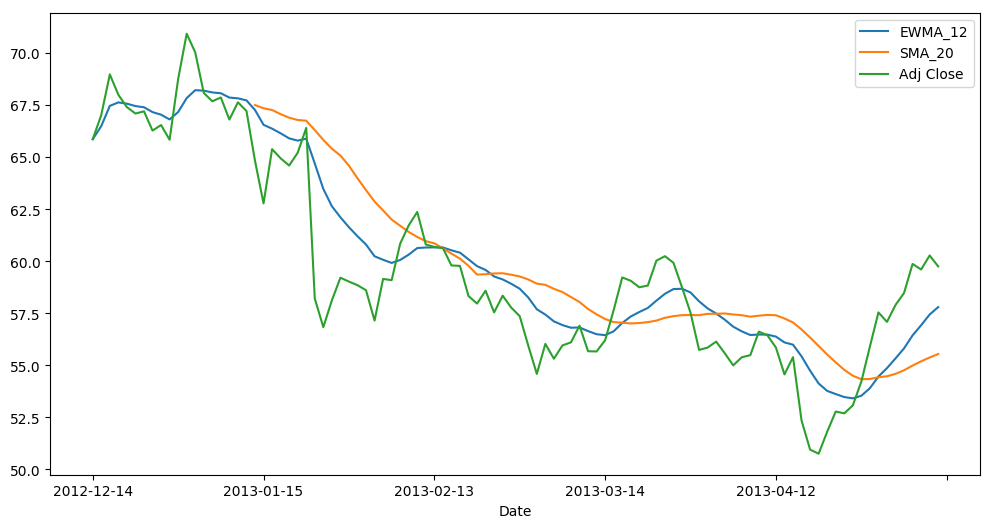

In [31]:
# df[['EWMA_12','SMA_20','Adj Close']][:-100].plot(figsize=(12,6))
tmp = df[['EWMA_12','SMA_20','Adj Close']]
tmp[:100].plot(figsize=(12,6))
plt.show()

In [32]:
df.dropna(inplace=True)
len(df)
df['Adj Close'].shift(-3).tail()

Date
2016-12-23    114.882584
2016-12-27    113.986984
2016-12-28           NaN
2016-12-29           NaN
2016-12-30           NaN
Name: Adj Close, dtype: float64

In [33]:
# X = df[['SMA_20','EWMA_12','HL_PCT','Return']].values

X = df[['EWMA_12','HL_PCT','Return']].values

y = df['Adj Close'].values
len(X), len(y)


(1000, 1000)

In [34]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,shuffle=False,random_state=1)



In [35]:
len(X), len(X_train), len(X_test)

(1000, 950, 50)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm

lr = LinearRegression()
KNN = KNeighborsRegressor()
SVR = svm.SVR()

In [81]:
lr.fit(X_train, y_train)
SVR.fit(X_train ,y_train)
KNN.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [82]:
y_pred_lr = lr.predict(X_test)
y_pred_SVR = SVR.predict(X_test)
y_pred_KNN = KNN.predict(X_test)
len(y_pred)
len(df)

1000

In [84]:
df['KNN_pred'] = np.nan
df['SVR_pred'] = np.nan
df['LR_pred'] = np.nan
df['KNN_pred'].iloc[950:] = y_pred_KNN
df['SVR_pred'].iloc[950:] = y_pred_SVR
df['LR_pred'].iloc[950:] = y_pred_lr
df.tail()

C:\Users\runmd\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Open,High,Low,Close,Adj Close,Volume,SMA_20,EWMA_12,HL_PCT,Return,Predication,KNN_pred,SVR_pred,LR_pred
Date,,,,,,,,,,,,,,
2016-12-23,115.589996,116.519997,115.589996,116.519997,114.675896,14181200,111.606757,113.460250,0.804569,0.001978,114.748470,112.902588,114.748470,114.517912
2016-12-27,116.519997,117.800003,116.489998,117.260002,115.404190,18296900,111.886754,113.759318,1.124564,0.006351,116.216932,114.871706,116.216932,114.911685
2016-12-28,117.519997,118.019997,116.199997,116.760002,114.912109,20905900,112.147560,113.936671,1.566265,-0.004264,115.246583,114.180956,115.246583,114.100998
2016-12-29,116.449997,117.110001,116.400002,116.730003,114.882584,15039500,112.453146,114.082196,0.609965,-0.000257,113.901015,115.269270,113.901015,115.112065
2016-12-30,116.650002,117.199997,115.430000,115.820000,113.986984,30586300,112.764637,114.067548,1.533394,-0.007796,114.605967,113.275552,114.605967,114.015358


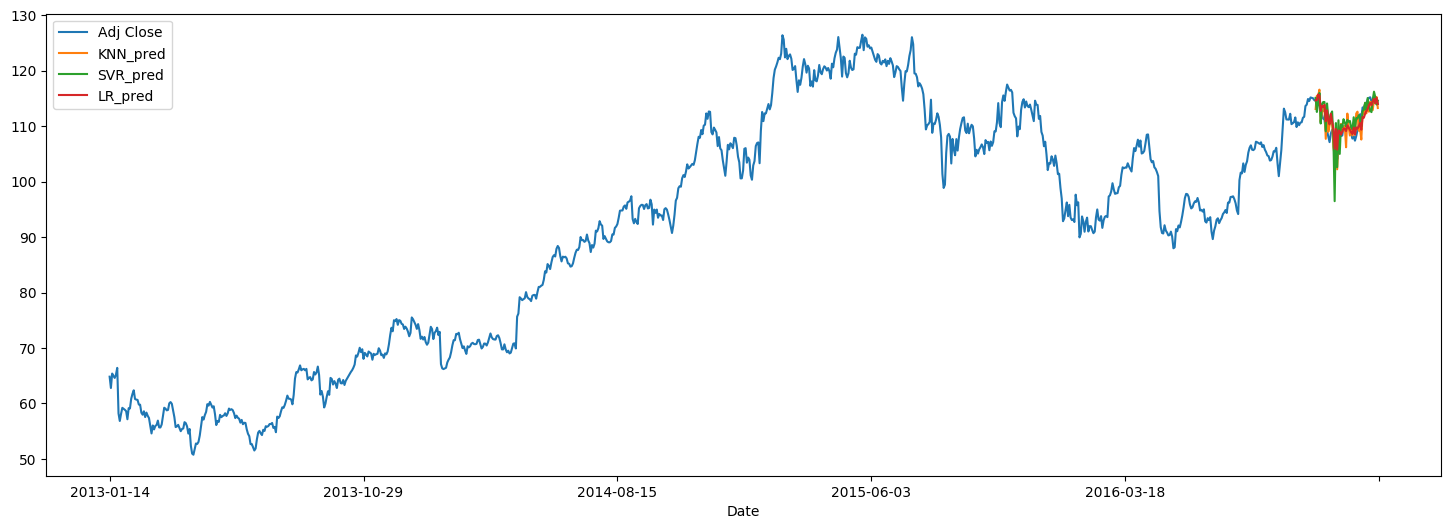

In [85]:
df[['Adj Close','KNN_pred','SVR_pred','LR_pred']].plot(figsize=(18,6))
plt.show()

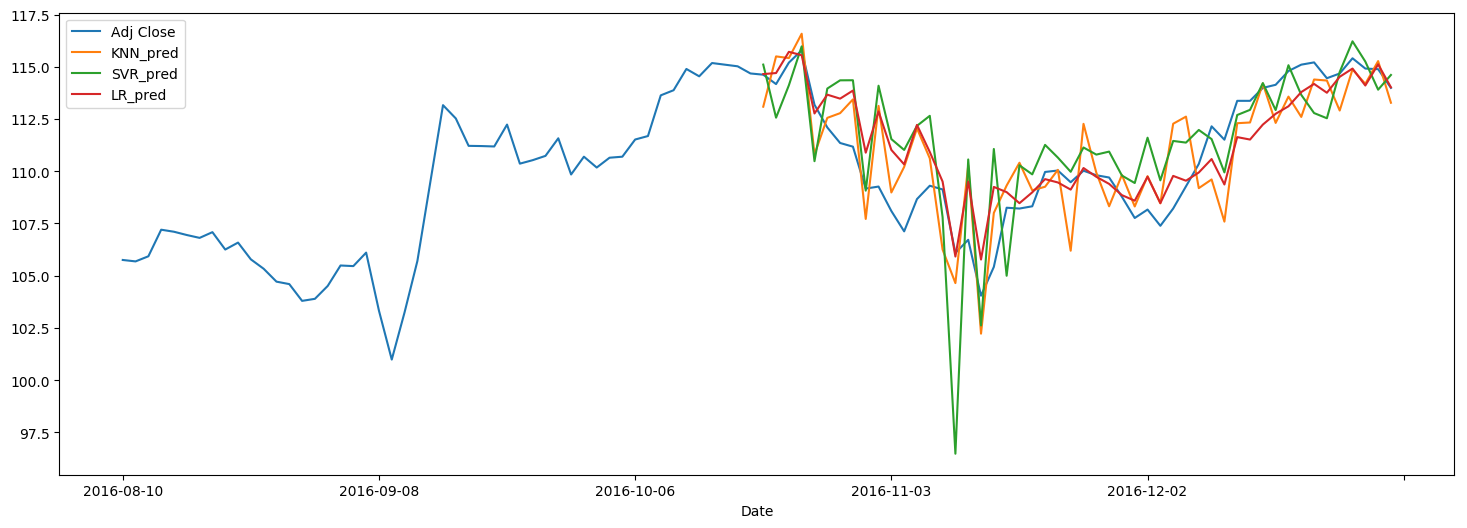

In [86]:

df[['Adj Close','KNN_pred','SVR_pred','LR_pred']][900:].plot(figsize=(18,6))
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error

LR_RMSE = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_lr))
KNN_RMSE = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_KNN))
SVR_RMSE = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_SVR))

In [90]:
print('Linear Regression :',LR_RMSE)
print('KNN :',KNN_RMSE)
print('Support Vector Regressor :',SVR_RMSE)

Linear Regression : 1.58078856304
KNN : 1.95295437659
Support Vector Regressor : 2.57190774784


In [66]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())